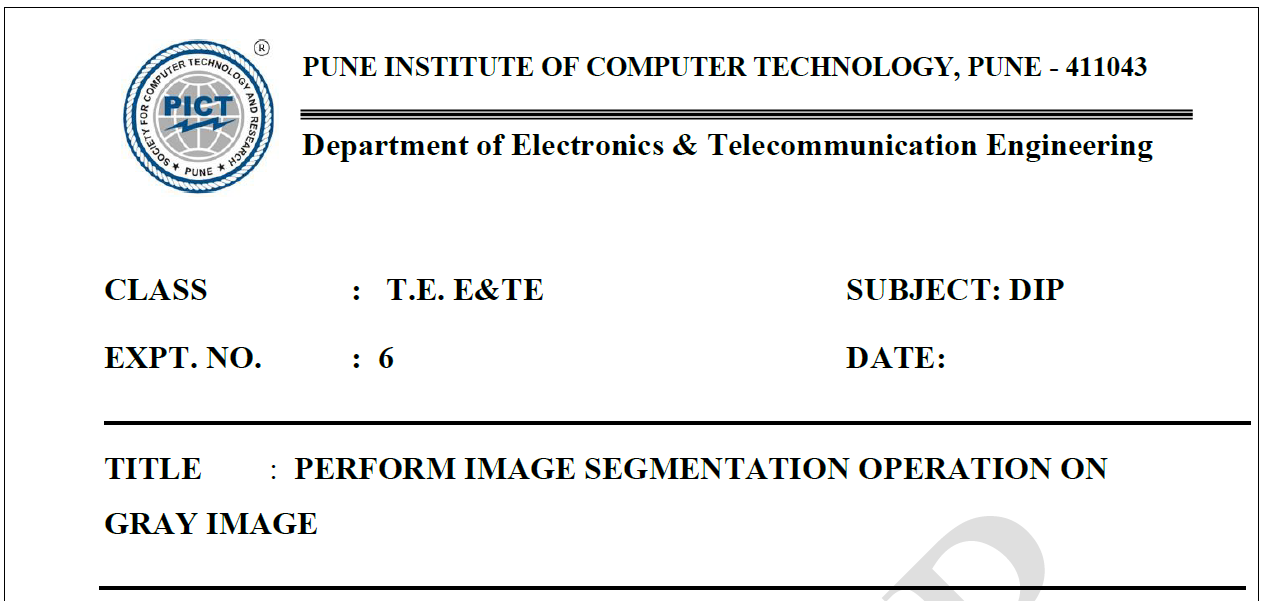

In [ ]:
!pip install VisionCraft

In [ ]:
from VisionCraft.vision.utils import imRead, imShow # !pip install VisionCraft
import matplotlib.pyplot as plt
import numpy as np

## 1. Point Detection

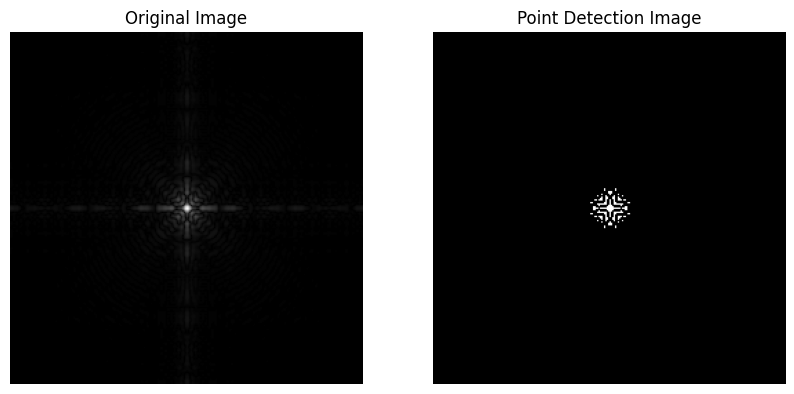

In [ ]:
"""
|R| > T

where T is non negative threshold and R is computed as sum of products of
coefficients of mask with the grey level values of image encompassed by the mask.

       |-1|-1|-1|
mask = |-1|+8|-1|
       |-1|-1|-1|

"""
T = 70

img = imRead("/content/drive/MyDrive/dip_Images/Fig0305(a)(DFT_no_log).tif")
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
mask = np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]])
for row in range(rows):
    for col in range(cols):
        replace = np.sum(img1[row:row+3, col:col+3] * mask)
        if replace > T:
            filtered_img[row,col]=  255
        else:
            filtered_img[row,col]=  0

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
imShow("Point Detection Image",filtered_img,subplot=True, row=1, col=2, num=2)
plt.show()

## 2. Line Detection

In [ ]:
img = imRead("/content/drive/MyDrive/dip_Images/Fig0305(a)(DFT_no_log).tif")

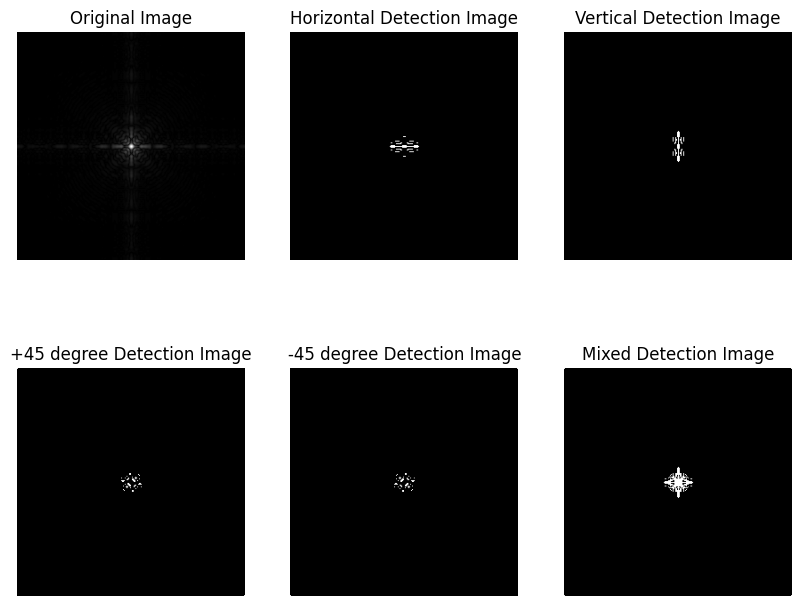

In [ ]:
"""
|R| > T

where T is non negative threshold and R is computed as sum of products of
coefficients of mask with the grey level values of image encompassed by the mask.

horizontal_mask = np.array([[-1,-1,-1],
                            [ 2, 2, 2],
                            [-1,-1,-1]])

vertical_mask = np.array([[-1, 2,-1],
                          [-1, 2,-1],
                          [-1, 2,-1]])

deg45_mask = np.array([[-1,-1, 2],
                       [-1, 2,-1],
                       [ 2,-1,-1]])


degn45_mask = np.array([[ 2,-1,-1],
                        [-1, 2,-1],
                        [-1,-1, 2]])

"""
T = 50

rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)

horizontal_mask = np.array([[-1,-1,-1],
                            [ 2, 2, 2],
                            [-1,-1,-1]])

vertical_mask = np.array([[-1, 2,-1],
                          [-1, 2,-1],
                          [-1, 2,-1]])
# +45*
deg45_mask = np.array([[-1,-1, 2],
                       [-1, 2,-1],
                       [ 2,-1,-1]])

# -45*
degn45_mask = np.array([[ 2,-1,-1],
                        [-1, 2,-1],
                        [-1,-1, 2]])
masks = [horizontal_mask, vertical_mask, deg45_mask, degn45_mask]
merged_img = np.zeros_like(img)
output  = []

for mask in masks:
    filtered_img = np.zeros_like(img)
    for row in range(rows):
        for col in range(cols):
            replace = np.sum(img1[row:row+3, col:col+3] * mask)
            if replace > T:
                filtered_img[row,col]=  255
                merged_img[row,col] = 255
            else:
                filtered_img[row,col] =  0
    output.append(filtered_img)

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=2,col=3, num=1)
imShow("Horizontal Detection Image",output[0],subplot=True, row=2, col=3, num=2)
imShow("Vertical Detection Image",output[1],subplot=True, row=2, col=3, num=3)
imShow("+45 degree Detection Image",output[2],subplot=True, row=2, col=3, num=4)
imShow("-45 degree Detection Image",output[3],subplot=True, row=2, col=3, num=5)
imShow("Mixed Detection Image",merged_img,subplot=True, row=2, col=3, num=6)
plt.show()

## 3. Global Thresholding

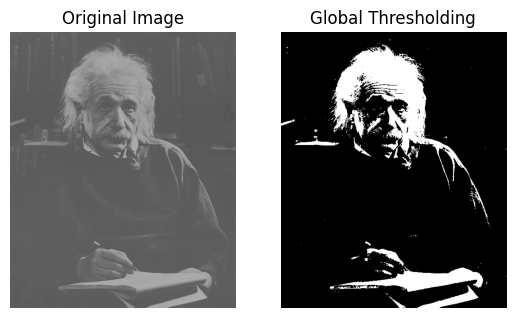

In [ ]:
img = imRead('/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif')
imShow("Original Image", img=img, subplot=True, row=1, col=2, num=1)
delta = 3
Tnew = np.min(img)+1
while abs(T-Tnew) >= delta:
    T = Tnew
    rows, cols = img.shape
    totalCells = rows*cols

    G1 = []
    G2 = []
    for row in range(rows):
        for col in range(cols):
            if img[row][col] > T:
                G1.append(img[row][col])
            else:
                G2.append(img[row][col])
    m1 = np.mean(G1)
    m2 = np.mean(G2)

    Tnew = (m1+m2)/2
for row in range(rows):
    for col in range(cols):
        if img[row][col] > T:
            img[row][col] = 255
        else:
            img[row][col] = 0
imShow("Global Thresholding",img=img, subplot=True, row=1, col=2, num=2)